In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
data_path = 'E:/INT104/CW_Data.xlsx'
data = pd.read_excel(data_path)

# 显示前几行数据
print(data.head())

   Index  Gender  Programme  Grade  Total  MCQ  Q1  Q2  Q3    Q4  Q5
0      1       1          3      3   45.0   21   8   4   2  10.0   0
1      2       2          3      3   43.0   21   4   2   8   8.0   0
2      3       1          4      2   26.0   24   0   0   2   0.0   0
3      4       2          1      3   30.0   24   4   0   0   0.0   2
4      5       1          2      3   27.0   21   0   2   4   0.0   0


In [4]:
data_without_index = data.iloc[:, 1:]
data_mean_no_index = data_without_index.mean()
data_std_no_index = data_without_index.std()


data_without_index

,Gender,Programme,Grade,Total,MCQ,Q1,Q2,Q3,Q4,Q5
0,1,3,3,45.0,21,8,4,2,10.0,0
1,2,3,3,43.0,21,4,2,8,8.0,0
2,1,4,2,26.0,24,0,0,2,0.0,0
3,2,1,3,30.0,24,4,0,0,0.0,2
4,1,2,3,27.0,21,0,2,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...
614,2,1,2,55.0,33,6,4,4,8.0,0
615,2,4,2,41.0,27,6,4,4,0.0,0
616,2,1,2,73.0,36,8,8,11,10.0,0
617,2,1,2,77.0,42,8,8,6,10.0,3


In [5]:
target = data_without_index['Programme']
target

0      3
1      3
2      4
3      1
4      2
      ..
614    1
615    4
616    1
617    1
618    1
Name: Programme, Length: 619, dtype: int64

In [6]:
features = data_without_index.drop('Programme', axis=1)
features

,Gender,Grade,Total,MCQ,Q1,Q2,Q3,Q4,Q5
0,1,3,45.0,21,8,4,2,10.0,0
1,2,3,43.0,21,4,2,8,8.0,0
2,1,2,26.0,24,0,0,2,0.0,0
3,2,3,30.0,24,4,0,0,0.0,2
4,1,3,27.0,21,0,2,4,0.0,0
...,...,...,...,...,...,...,...,...,...
614,2,2,55.0,33,6,4,4,8.0,0
615,2,2,41.0,27,6,4,4,0.0,0
616,2,2,73.0,36,8,8,11,10.0,0
617,2,2,77.0,42,8,8,6,10.0,3


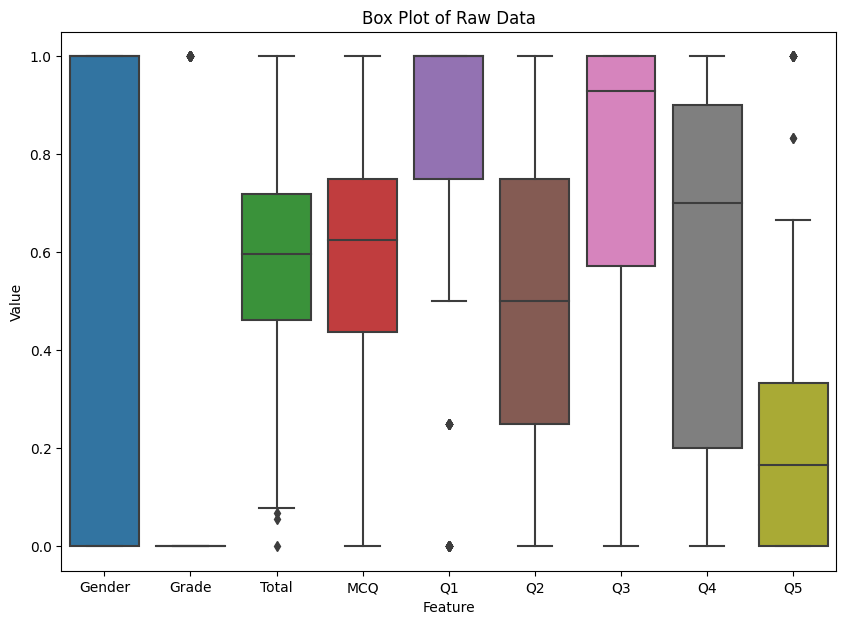

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 归一化
feature_normalized = (features - features.min()) / (features.max() - features.min())

plt.figure(figsize=(10, 7))
sns.boxplot(data = feature_normalized)
plt.title('Box Plot of Raw Data')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 划分训练，测试集
X_train, X_test, y_train, y_test = train_test_split(feature_normalized, target, test_size=0.2, random_state=42)


print('------------------X_train------------------')
print(X_train)
print('------------------y_train------------------')
print(y_train)

------------------X_train------------------
     Gender  Grade     Total     MCQ    Q1    Q2        Q3   Q4        Q5
531     1.0    0.0  0.528090  0.4375  1.00  0.25  0.714286  0.7  0.666667
364     1.0    0.0  0.505618  0.5625  1.00  0.25  0.428571  0.7  0.000000
177     1.0    0.0  0.685393  0.8125  1.00  0.50  0.571429  0.7  0.000000
594     1.0    0.0  0.247191  0.4375  0.50  0.00  0.142857  0.0  0.000000
199     0.0    0.0  0.505618  0.3125  1.00  0.50  0.928571  1.0  0.000000
..      ...    ...       ...     ...   ...   ...       ...  ...       ...
71      1.0    0.0  0.842697  0.8125  0.75  1.00  1.000000  1.0  0.500000
106     1.0    0.0  0.539326  0.6250  0.75  0.50  0.428571  0.7  0.000000
270     1.0    0.0  0.831461  0.9375  1.00  1.00  1.000000  0.2  0.333333
435     1.0    0.0  0.865169  0.8750  1.00  0.50  1.000000  0.9  0.833333
102     1.0    0.0  0.786517  0.7500  1.00  0.75  1.000000  0.7  0.666667

[495 rows x 9 columns]
------------------y_train------------------


# DecisionTreeClassifier

'''
决策树是一种常用的机器学习算法，主要用于分类和回归任务。其原理可以简单概括为以下几个步骤：
1. **选择特征**：决策树从根节点开始，选择一个特征作为节点的划分依据。选择的特征要能够最大程度地提高节点的纯度，即让左子树和右子树中的数据尽可能属于同一类别。
2. **划分数据集**：根据特征的取值，将数据集划分为几个子集。例如，如果特征是“是否有房”，则数据集可能被划分为“有房”和“无房”两个子集。
3. **重复过程**：对每个子集重复上述过程，选择新的特征并划分数据集，直至满足停止条件。停止条件可能包括子节点数据量小于某个阈值、节点纯度达到一定程度或者树的最大深度等。
4. **生成树结构**：最终，这个递归过程生成一棵树，每个内部节点代表一个特征，每个分支代表这个特征的一个取值，每个叶节点代表一个类别标签。
5. **预测新数据**：当有新的数据需要分类时，从根节点开始，根据数据的特征值选择分支，直至达到叶节点，叶节点的类别标签即为预测结果。
决策树的优势在于模型的可解释性强，能够清晰地展示决策过程。但它也有缺点，比如容易过拟合、对输入数据的顺序敏感等。为了克服这些缺点，通常会配合剪枝技术（如预剪枝、后剪枝）或者随机森林等方法来提高模型的泛化能力。

'''

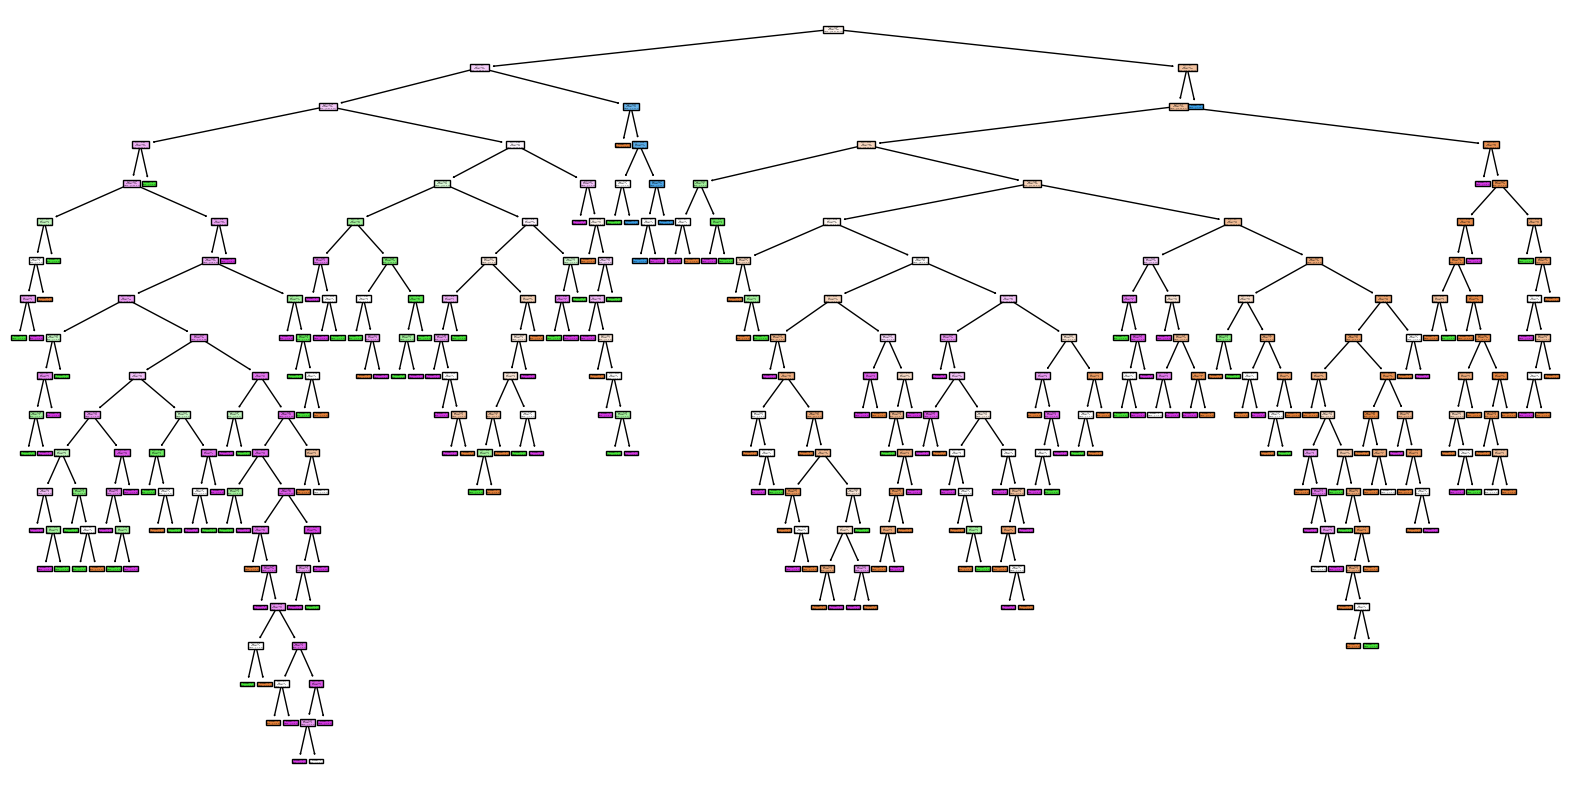

Accuracy: 0.5403225806451613
Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.62      0.61        50
           2       0.34      0.48      0.40        21
           3       1.00      1.00      1.00         5
           4       0.55      0.44      0.49        48

    accuracy                           0.54       124
   macro avg       0.62      0.63      0.62       124
weighted avg       0.55      0.54      0.54       124

Confusion Matrix:
[[31  6  0 13]
 [ 7 10  0  4]
 [ 0  0  5  0]
 [14 13  0 21]]


In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the decision tree classifier 训练
tc = DecisionTreeClassifier(random_state=42)
tc.fit(X_train, y_train)  

# 可视化决策树
plt.figure(figsize=(20, 10))  # 设置足够大的图形尺寸以清晰显示决策树
plot_tree(tc, filled=True)
plt.show()

# Make predictions 预测
predictions = tc.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


#  RandomForestClassifier

降低过拟合：随机森林通过集成多个决策树，每个树都在不同的数据样本和特征子集上训练，这样可以减少单一决策树的过拟合风险，提高模型的泛化能力。
提高准确性：随机森林的集成方法通常能够提供比单个决策树更准确的预测结果。在分类任务中，通过多数投票来减少错误分类；在回归任务中，通过取平均值来减少预测误差。

In [10]:
# Initialize a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, predictions)


print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


Accuracy: 0.6129032258064516
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.80      0.73        50
           2       0.35      0.38      0.36        21
           3       1.00      1.00      1.00         5
           4       0.64      0.48      0.55        48

    accuracy                           0.61       124
   macro avg       0.66      0.67      0.66       124
weighted avg       0.62      0.61      0.61       124

Confusion Matrix:
[[40  2  0  8]
 [ 8  8  0  5]
 [ 0  0  5  0]
 [12 13  0 23]]


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [13]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-validation Scores: [0.60606061 0.57575758 0.57575758 0.63636364 0.54545455]
Mean CV Score: 0.5878787878787879


# SVM

In [14]:
from sklearn.svm import SVC

# Step 3: Training the SVM Model
svm_classifier = SVC(kernel='linear', C=1.0)  # Linear SVM
svm_classifier.fit(X_train, y_train)

# Step 5: Evaluation
predictions = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.6854838709677419
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.82      0.74        50
           2       0.00      0.00      0.00        21
           3       1.00      1.00      1.00         5
           4       0.67      0.81      0.74        48

    accuracy                           0.69       124
   macro avg       0.59      0.66      0.62       124
weighted avg       0.57      0.69      0.62       124

Confusion Matrix:
[[41  0  0  9]
 [11  0  0 10]
 [ 0  0  5  0]
 [ 9  0  0 39]]


D:\miniconda\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\miniconda\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\miniconda\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  Naive_bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Step 4: Evaluation
predictions = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.6451612903225806
Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.80      0.73        50
           2       0.17      0.05      0.07        21
           3       1.00      1.00      1.00         5
           4       0.63      0.71      0.67        48

    accuracy                           0.65       124
   macro avg       0.62      0.64      0.62       124
weighted avg       0.59      0.65      0.61       124

Confusion Matrix:
[[40  0  0 10]
 [10  1  0 10]
 [ 0  0  5  0]
 [ 9  5  0 34]]


#   Ensemble classifier

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Step 2: Define classifiers
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC(kernel='linear', probability=True)  # We need probability estimates for voting
naive_bayes_classifier = GaussianNB()

# Step 3: Build ensemble classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree_classifier),
    ('svm', svm_classifier),
    ('naive_bayes', naive_bayes_classifier)
], voting='soft')  # Using soft voting for probability estimates

# Step 4: Train ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Step 5: Compare feature importance

# For decision trees
decision_tree_classifier.fit(X_train, y_train)  # Need to fit before accessing feature importances
decision_tree_feature_importance = decision_tree_classifier.feature_importances_

# For SVM, we can't directly get feature importance
if hasattr(svm_classifier, 'coef_'):
    svm_classifier.fit(X_train, y_train)  # Need to fit before accessing coefficients
    svm_feature_importance = np.abs(svm_classifier.coef_)
else:
    svm_feature_importance = None

# For Naive Bayes, we can't directly get feature importance
# But for GaussianNB, we can check the variance of each feature (higher variance might imply higher importance)
naive_bayes_classifier.fit(X_train, y_train)  # Need to fit before accessing variance
naive_bayes_feature_importance = np.var(X_train, axis=0)


print('----------------------------------------------------------------------')
print("Decision Tree Feature Importance:", decision_tree_feature_importance)
print('----------------------------------------------------------------------')
print("SVM Feature Importance (Coefficients):", svm_feature_importance)
print('----------------------------------------------------------------------')
print("Naive Bayes Feature Importance (Variance):", naive_bayes_feature_importance)
print('----------------------------------------------------------------------')

# Step 5: Evaluate ensemble classifier
ensemble_predictions = ensemble_classifier.predict(X_test)
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Classifier Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

----------------------------------------------------------------------
Decision Tree Feature Importance: [0.05685599 0.1154038  0.32049925 0.11651234 0.06172014 0.06300901
 0.0980138  0.10479592 0.06318976]
----------------------------------------------------------------------
SVM Feature Importance (Coefficients): None
----------------------------------------------------------------------
Naive Bayes Feature Importance (Variance): Gender    0.227952
Grade     0.062222
Total     0.034284
MCQ       0.035664
Q1        0.074411
Q2        0.096152
Q3        0.087418
Q4        0.130312
Q5        0.059085
dtype: float64
----------------------------------------------------------------------
Ensemble Classifier Accuracy: 0.6048387096774194
Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.80      0.73        50
           2       0.17      0.05      0.07        21
           3       1.00      1.00      1.00         5
           4      

In [17]:
print(len(predictions))
print(predictions)
print(y_test.iloc[:])

124
[4 1 1 4 1 1 4 2 4 4 4 4 4 4 2 1 1 1 1 2 4 1 4 3 4 4 4 4 1 1 3 4 1 4 1 1 1
 1 4 1 4 1 1 1 4 1 4 4 1 4 4 1 1 4 2 3 4 1 1 1 1 4 1 2 4 4 4 1 3 1 1 1 4 2
 4 4 1 4 4 4 4 1 1 1 4 1 1 3 1 4 1 4 1 4 1 1 1 4 4 1 4 4 1 1 1 1 1 4 4 1 1
 4 4 1 4 1 4 1 4 4 4 1 1 1]
49     4
583    1
82     1
305    2
109    2
      ..
6      4
104    4
114    1
158    1
181    1
Name: Programme, Length: 124, dtype: int64


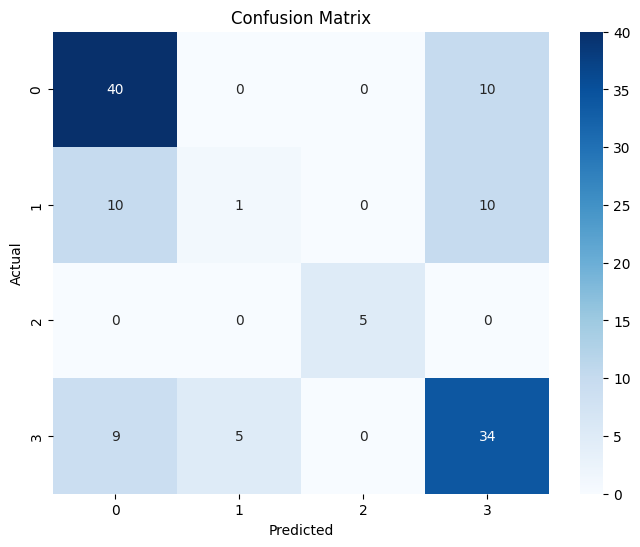

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()